model development

train-test split

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
final_df = pd.read_csv(r"C:\Users\jaguh\OneDrive\Desktop\car dekho2\final data.csv")

final_df=final_df.drop(columns=['Unnamed: 0'])
final_df.head()

,Year of car manufacture,Width,Color,kilometer driven,Transmission type,price,Body type,Length,Brand Name,Fuel type,city,Seats,Car model,Number of previous owners,Insurance Validity_value,Engine Displacement_value(cc)
0,2022,139,8,20000,0,1150000.0,7,101,13,4,5,5.0,100,1,5,998
1,2015,22,57,20687,1,415000.0,5,39,20,4,5,7.0,145,1,2,1196
2,2021,118,86,30000,1,750000.0,7,98,24,4,5,5.0,197,1,5,999
3,2015,38,116,59247,1,398000.0,2,26,9,4,5,5.0,82,1,2,1086
4,2015,70,86,50000,1,550000.0,2,82,8,4,5,5.0,61,1,5,1199


In [4]:
# Strip whitespace from all column names
final_df.columns = final_df.columns.str.strip()

# Now you can safely drop 'price' and create the feature and target variables
X = final_df.drop(columns=['price'])  # Features (excluding the target variable)
y = final_df['price']  # Target variable
print(final_df.columns)

Index(['Year of car manufacture', 'Width', 'Color', 'kilometer driven',
       'Transmission type', 'price', 'Body type', 'Length', 'Brand Name',
       'Fuel type', 'city', 'Seats', 'Car model', 'Number of previous owners',
       'Insurance Validity_value', 'Engine Displacement_value(cc)'],
      dtype='object')


In [5]:
X = final_df.drop(columns=['price'])  # Features (excluding the target variable)
y = final_df['price']  # Target variable

# Split the dataset into training and testing sets
# Using an 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f'Training feature set shape: {X_train.shape}')
print(f'Testing feature set shape: {X_test.shape}')
print(f'Training target set shape: {y_train.shape}')
print(f'Testing target set shape: {y_test.shape}')

Training feature set shape: (5798, 15)
Testing feature set shape: (2485, 15)
Training target set shape: (5798,)
Testing target set shape: (2485,)


linear regression

Mean Squared Error: 546777516671.85
Mean Absolute Error: 420505.48
R-squared: 0.59


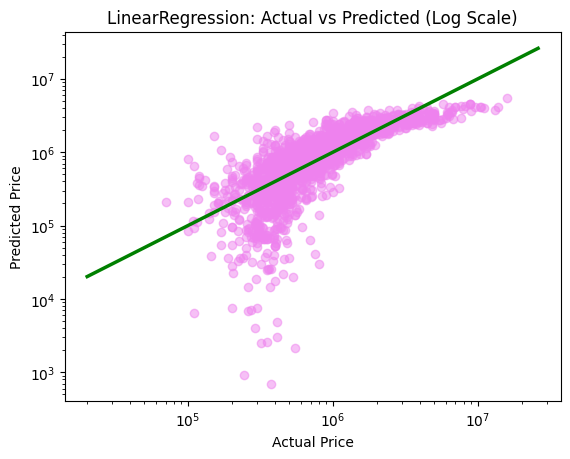

In [7]:
# Assuming final_df is already defined and loaded
X = final_df.drop(columns=['price'])  # Features (excluding the target variable)
y = final_df['price']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

plt.scatter(y_test, y_pred, color='violet', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('LinearRegression: Actual vs Predicted (Log Scale)')
plt.show()

random forest regression

Mean Squared Error: 95852311086.63
Mean Absolute Error: 126926.94
R-squared: 0.93


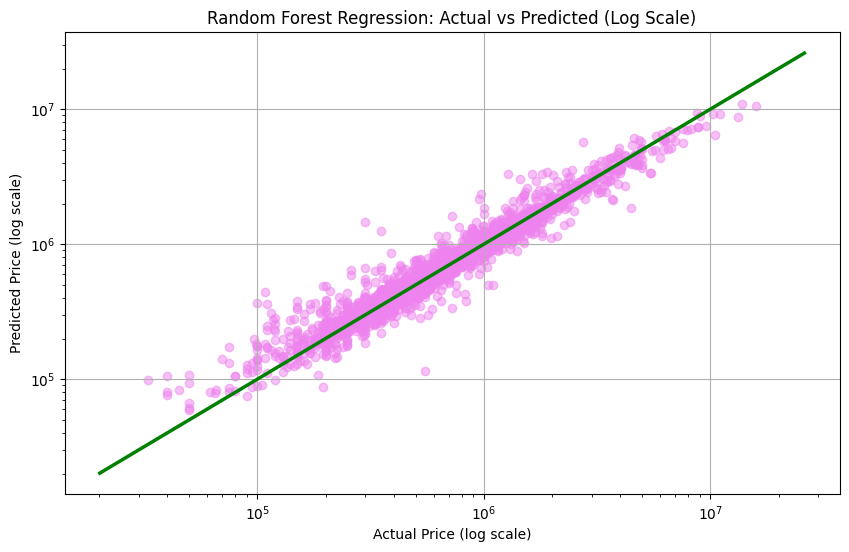

In [8]:
X = final_df.drop(columns=['price'])
y = final_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = RandomForestRegressor(n_estimators=300, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='violet', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.title('Random Forest Regression: Actual vs Predicted (Log Scale)')
plt.grid(True)
plt.show()

decision tree regression

Decision Tree - Mean Squared Error: 294390087407.81
Decision Tree - Mean Absolute Error: 181895.71
Decision Tree - R-squared: 0.78


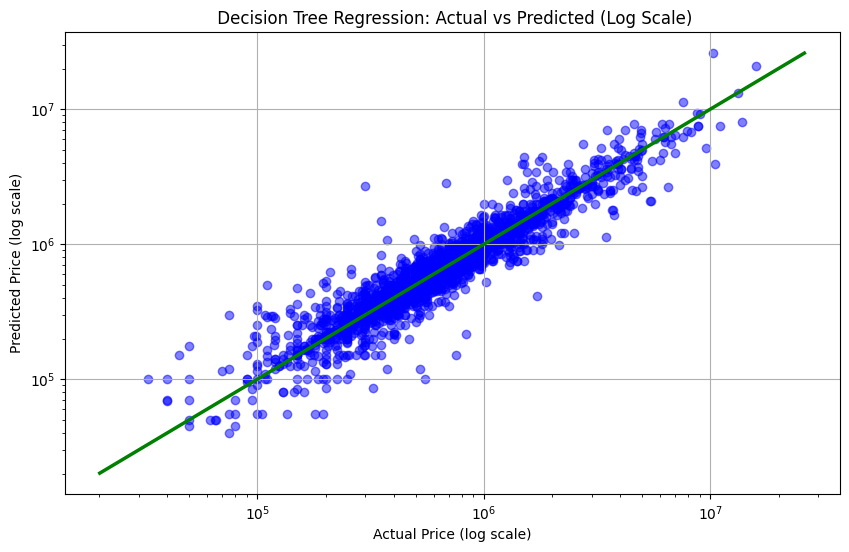

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree model
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree - Mean Squared Error: {mse_tree:.2f}')
print(f'Decision Tree - Mean Absolute Error: {mae_tree:.2f}')
print(f'Decision Tree - R-squared: {r2_tree:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.title(' Decision Tree Regression: Actual vs Predicted (Log Scale)')
plt.grid(True)
plt.show()

gradient boosting regression

Gradient Boosting - Mean Squared Error: 76288721024.83
Gradient Boosting - Mean Absolute Error: 130299.17
Gradient Boosting - R-squared: 0.94


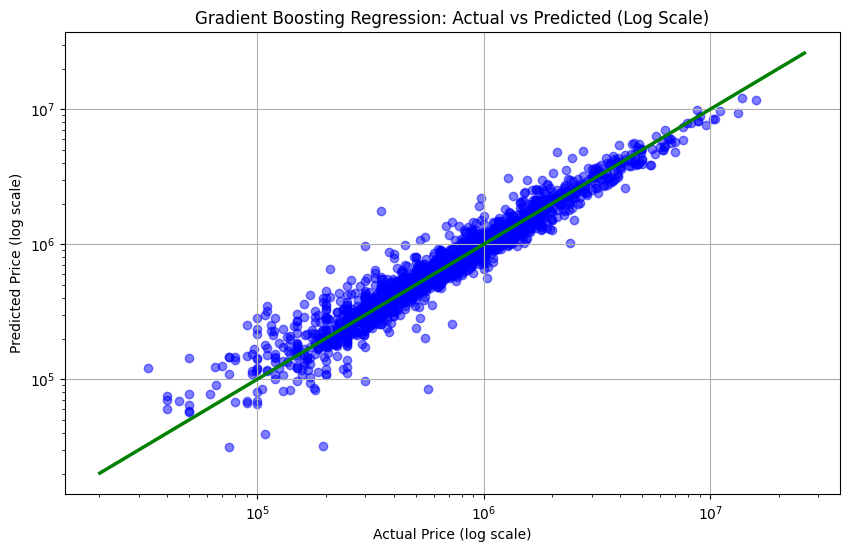

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=300, random_state=0)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Printing evaluation metrics
print(f'Gradient Boosting - Mean Squared Error: {mse_gb:.2f}')
print(f'Gradient Boosting - Mean Absolute Error: {mae_gb:.2f}')
print(f'Gradient Boosting - R-squared: {r2_gb:.2f}')

# Plotting Actual vs Predicted values on log scale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.title('Gradient Boosting Regression: Actual vs Predicted (Log Scale)')
plt.grid(True)
plt.show()

lasso regression

Lasso Regression - Mean Squared Error: 546777328239.41
Lasso Regression - Mean Absolute Error: 420504.90
Lasso Regression - R-squared: 0.59


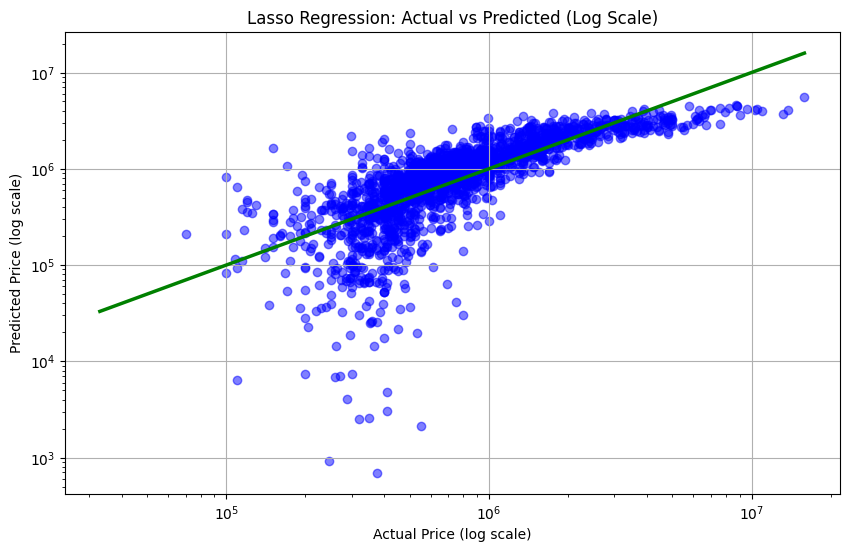

In [11]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Lasso model
lasso_model = Lasso(alpha=1.0, random_state=0)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Printing evaluation metrics
print(f'Lasso Regression - Mean Squared Error: {mse_lasso:.2f}')
print(f'Lasso Regression - Mean Absolute Error: {mae_lasso:.2f}')
print(f'Lasso Regression - R-squared: {r2_lasso:.2f}')

# Plotting Actual vs Predicted values on log scale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linewidth=2.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.title('Lasso Regression: Actual vs Predicted (Log Scale)')
plt.grid(True)
plt.show()

ridge regression

Ridge Regression - Mean Squared Error: 546765689531.80
Ridge Regression - Mean Absolute Error: 420485.03
Ridge Regression - R-squared: 0.59


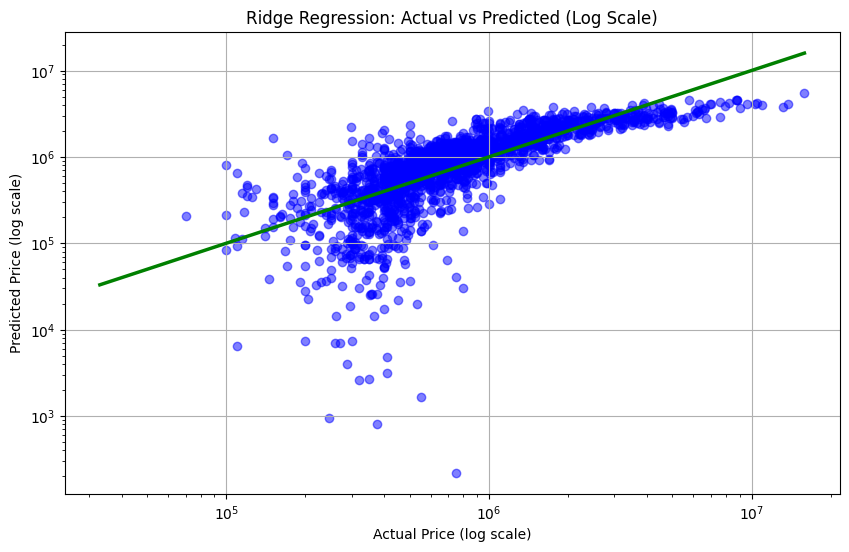

In [12]:
from sklearn.linear_model import Ridge

# Ridge model
ridge_model = Ridge(alpha=1.0, random_state=0)
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Printing evaluation metrics
print(f'Ridge Regression - Mean Squared Error: {mse_ridge:.2f}')
print(f'Ridge Regression - Mean Absolute Error: {mae_ridge:.2f}')
print(f'Ridge Regression - R-squared: {r2_ridge:.2f}')

# Plotting Actual vs Predicted values on log scale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linewidth=2.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.title('Ridge Regression: Actual vs Predicted (Log Scale)')
plt.grid(True)
plt.show()

feature importance from random forest

In [13]:
model = RandomForestRegressor(n_estimators=300, random_state=0)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Display importance for each feature
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

Year of car manufacture: 0.12246227907239116
Width: 0.4111039558834872
Color: 0.007836950994417113
kilometer driven: 0.07779474174807544
Transmission type: 0.030093368794286177
Body type: 0.008727388827296767
Length: 0.1915508430993853
Brand Name: 0.00862456995884004
Fuel type: 0.0025319130179000666
city: 0.0063692910982475455
Seats: 0.014950783401017997
Car model: 0.01865317134924659
Number of previous owners: 0.002563023672835683
Insurance Validity_value: 0.001800723471219979
Engine Displacement_value(cc): 0.0949369956113531


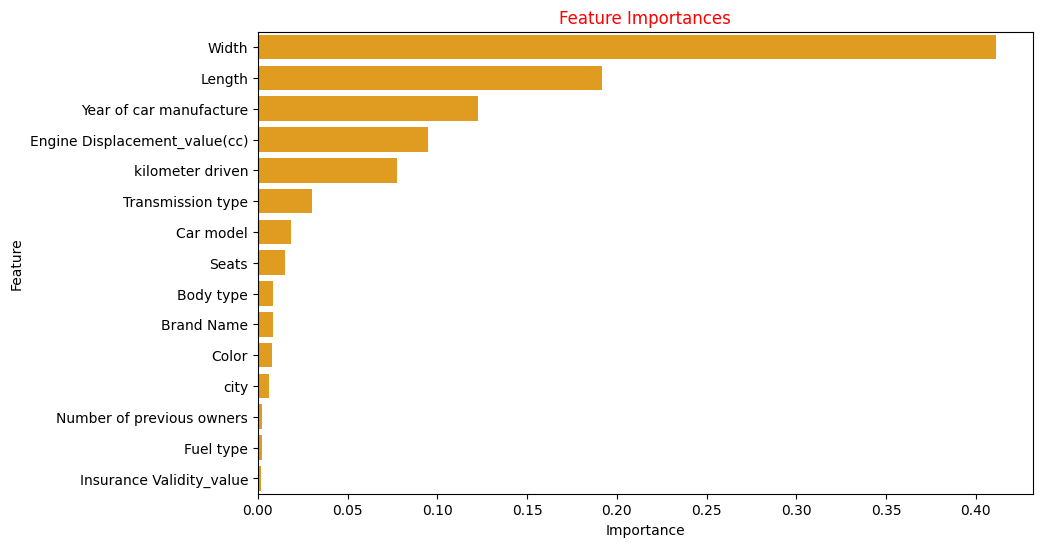

In [14]:
# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df,color='orange')
plt.title('Feature Importances',color='red')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [15]:
# Save the model to a .pkl file
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(gb_model, model_file)